In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx"

In [4]:
!pip install openpyxl

In [5]:
"""Carregando um arquivo Excel dentro de um DataFrame

--> sheet_name é o parâmetro para designar qual pasta da planilha será carregada
--> skiprows é o parâmetro para definir de onde começará a leitura do excel, no caso abaixo, à partir da linha 20
--> skipfooter é o parâmetro que indica as últimas linhas a serem lidas no DF
"""
df =  pd.read_excel(
    'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2)

In [6]:
df.drop([ 'Unnamed: 43',
       'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47',
       'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50'], axis=1, inplace=True)

In [7]:
print(df.shape)

(195, 43)


In [8]:
df

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,...,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,...,56,91,77,71,64,60,102,69,46,59


In [9]:
df.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

In [10]:
df = df.rename(columns= {'OdName':'Country', 'AreaName':'Continent','RegName':'Region'})

In [11]:
"""List comprehension
--> all(target) Retorna True se todos os elementos iteráveis forem True, caso o contrário, retorna False
--> isinstance(target, type) Retorna True se o elemento verificado for do tipo indicado, caso contrário retorna false
"""
all(isinstance(column,str) for column in df.columns)

False

In [12]:
"""
--> list() transforma os dados recebidos em uma lista
--> map(função, target) aplica uma função para cada iterável do alvo
"""
df.columns = list(map(str, df.columns))

In [13]:
"""List comprehension
--> all(target) Retorna True se todos os elementos iteráveis forem True, caso o contrário, retorna False
--> isinstance(target, type) Retorna True se o elemento verificado for do tipo indicado, caso contrário retorna false
"""
all(isinstance(column,str) for column in df.columns)

True

In [14]:
df.set_index('Country',inplace=True)

In [15]:
df

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,2741,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,7,...,124,161,140,122,133,128,211,160,174,217


In [20]:
#df['Total'] = df.sum(axis=1)
df

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,2741,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146
Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,7,...,161,140,122,133,128,211,160,174,217,2985


In [21]:
print('Data dimensions:', df.shape)

Data dimensions: (195, 38)


In [22]:
years = list(map(str, range(1980,2014)))

In [23]:
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [51]:
"""Atribuindo as informações dos 5 países que possuem o total de imigração maior
--> sort_values(['Coluna p/ filtrar']) ordena os valores de forma ascendent"""
df_top5 = df.sort_values(['Total'], ascending = False).head()

In [53]:
df_top5 = df_top5[years].transpose()
df_top5



Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668
1985,4211,1816,9564,3150,514
1986,7150,1960,9470,4166,691
1987,10189,2643,21337,7360,1072
1988,11522,2758,27359,8639,1334
1989,10343,4323,23795,11865,2261


In [65]:
print(all(isinstance(row, int) for row in df_top5.index))

True


In [64]:
df_top5.index = map(int, df_top5.index)

In [68]:
for row in df_top5.index:
    print(type(row),row)

<class 'int'> 1980
<class 'int'> 1981
<class 'int'> 1982
<class 'int'> 1983
<class 'int'> 1984
<class 'int'> 1985
<class 'int'> 1986
<class 'int'> 1987
<class 'int'> 1988
<class 'int'> 1989
<class 'int'> 1990
<class 'int'> 1991
<class 'int'> 1992
<class 'int'> 1993
<class 'int'> 1994
<class 'int'> 1995
<class 'int'> 1996
<class 'int'> 1997
<class 'int'> 1998
<class 'int'> 1999
<class 'int'> 2000
<class 'int'> 2001
<class 'int'> 2002
<class 'int'> 2003
<class 'int'> 2004
<class 'int'> 2005
<class 'int'> 2006
<class 'int'> 2007
<class 'int'> 2008
<class 'int'> 2009
<class 'int'> 2010
<class 'int'> 2011
<class 'int'> 2012
<class 'int'> 2013


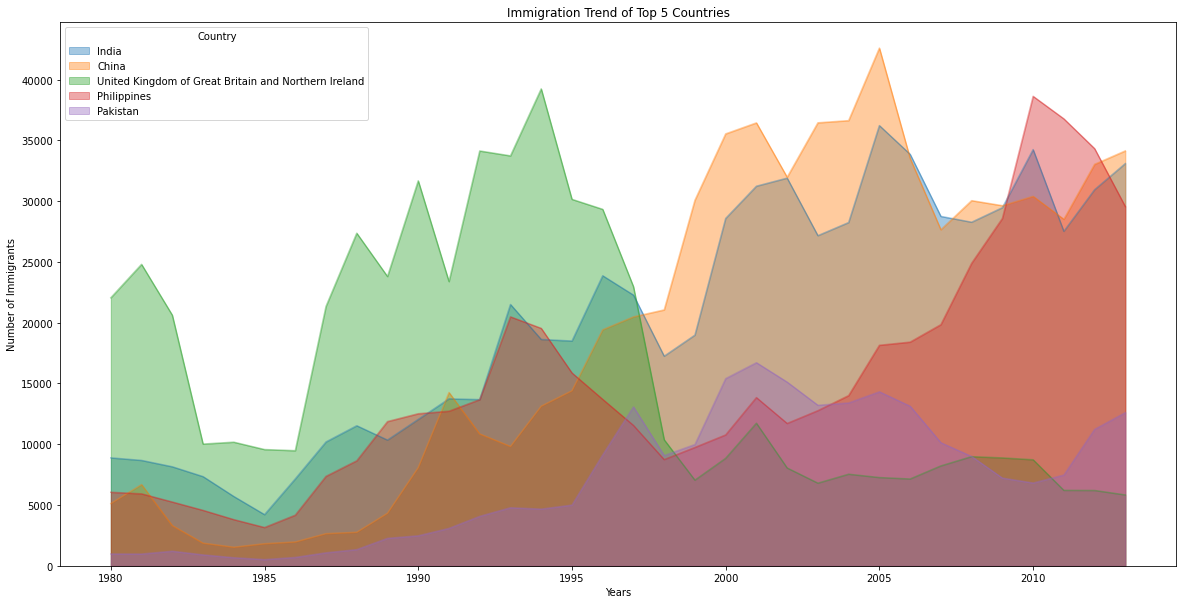

In [82]:
ax = df_top5.plot(kind='area', stacked = False, alpha = 0.4, figsize = (20,10))

ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

plt.show()

In [90]:
df_least5 = df.sort_values(['Total'], ascending = True).head()

In [91]:
df_least5

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Palau,Oceania,Micronesia,Developing regions,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
Marshall Islands,Oceania,Micronesia,Developing regions,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,2
Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
San Marino,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,5
New Caledonia,Oceania,Melanesia,Developing regions,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,2,5


In [97]:
df_least5 = df_least5[years].transpose()

In [99]:
all(isinstance(row, int) for row in df_least5.index)

False

In [108]:
df_least5.index = map(int, df_least5.index)

In [109]:
all(isinstance(row, int) for row in df_least5.index)

True

Text(0, 0.5, 'Total')

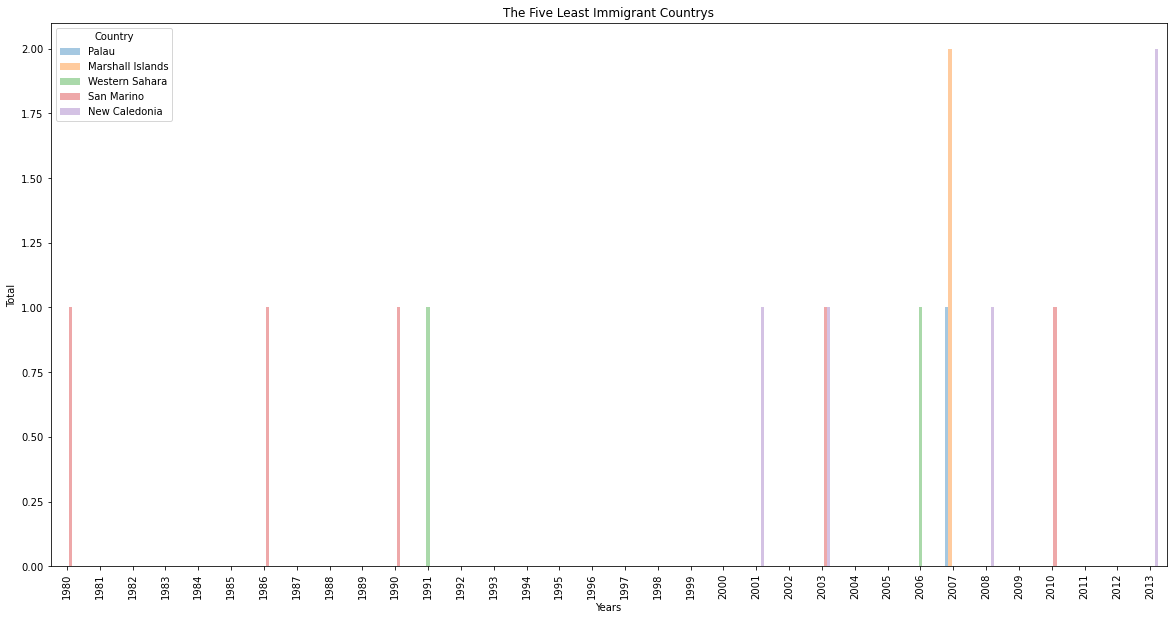

In [116]:
pleast = df_least5.plot(kind='bar', stacked = False, alpha = 0.4, figsize = (20,10))
pleast.set_title('The Five Least Immigrant Countrys')
pleast.set_xlabel('Years')
pleast.set_ylabel('Total')

<AxesSubplot:ylabel='Frequency'>

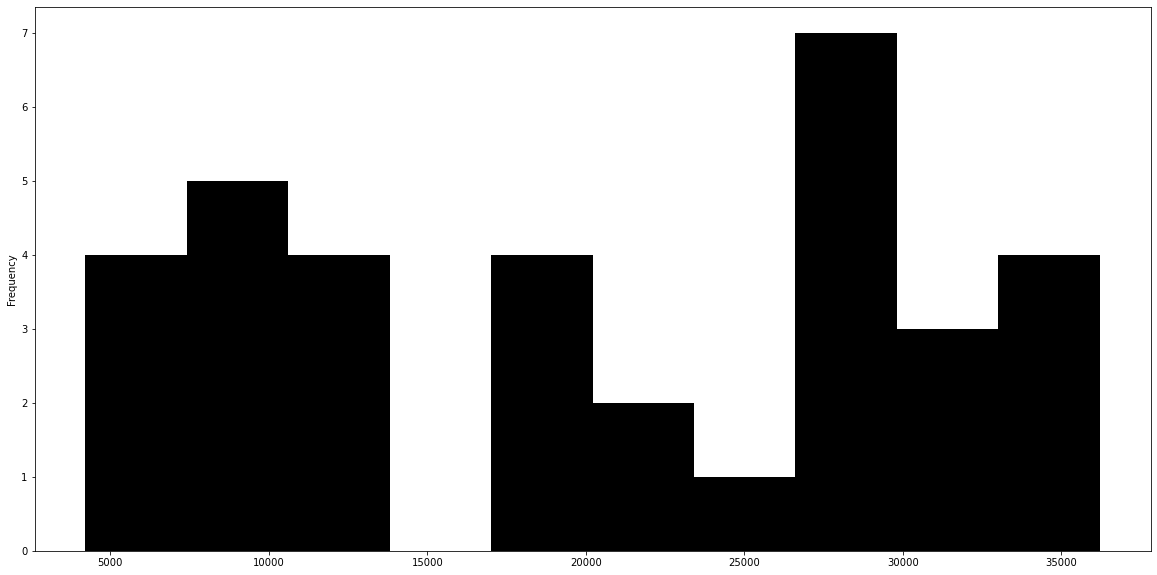

In [139]:
df_top5['India'].plot(kind='hist',figsize = (20,10), color ='black')